In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
amaz = pd.read_csv('amazon_cells_labelled.txt', delimiter="\t", header = None)
amaz.columns = ['message','positive']

print(amaz)

                                               message  positive
0    So there is no way for me to plug it in here i...         0
1                          Good case, Excellent value.         1
2                               Great for the jawbone.         1
3    Tied to charger for conversations lasting more...         0
4                                    The mic is great.         1
5    I have to jiggle the plug to get it to line up...         0
6    If you have several dozen or several hundred c...         0
7          If you are Razr owner...you must have this!         1
8                  Needless to say, I wasted my money.         0
9                     What a waste of money and time!.         0
10                     And the sound quality is great.         1
11   He was very impressed when going from the orig...         1
12   If the two were seperated by a mere 5+ ft I st...         0
13                            Very good quality though         1
14   The design is very o

In [41]:
keywords = ['great', 'fantastic', 'wonderful', 'good', 'friend', 'love', 'excellent', 'perfect', 'happy', 'fine', 'impressed',
           'recommend']

for key in keywords:
    amaz[str(key)] = amaz.message.str.contains(' '+ str(key) + ' ', case=False)

In [42]:
amaz['positive'] = (amaz['positive'] == 1)
amaz

,message,positive,great,fantastic,wonderful,good,friend,love,excellent,perfect,happy,fine,impressed,recommend
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,True,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,False,False,False,False,False,False,False,False,False,False,False,False,False


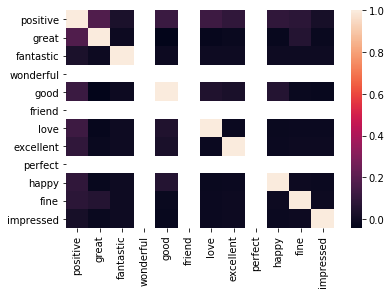

In [37]:
sns.heatmap(amaz.corr())

In [43]:
data = amaz[keywords]
target = amaz['positive']


In [44]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)
print(y_pred)

[False  True False False False False False False False False False  True
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True  True False False False False False False
 False False False False False False  True  True False False  True False
 False  True  True False False False False False False  True False False
 False False False False False  True  True False False  True False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False  True False False False False False  True False
 False False False False False False False False False False False False
 False  True  True False False False False False Fa

In [45]:
print("Number of mislabeled points out of the total {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of the total 1000 points: 394
